# Analysis on Walmart sales forcasting

In [2]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

# upload the data from csv file


In [4]:
train_df=pd.read_csv('train.csv')

In [5]:
features_df=pd.read_csv('features.csv')
stores_df=pd.read_csv('sampleSubmission.csv')
test_df=pd.read_csv('test.csv')

In [6]:
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
train_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [9]:
train_df.isnull()

Store   Dept   Date  Weekly_Sales  IsHoliday
0       False  False  False         False      False
1       False  False  False         False      False
2       False  False  False         False      False
3       False  False  False         False      False
4       False  False  False         False      False
...       ...    ...    ...           ...        ...
421565  False  False  False         False      False
421566  False  False  False         False      False
421567  False  False  False         False      False
421568  False  False  False         False      False
421569  False  False  False         False      False

[421570 rows x 5 columns]

In [10]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [11]:
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
features_df['IsHoliday']= label_encoder.fit_transform(features_df['IsHoliday'])


features_df


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106          0  
1           NaN        NaN        NaN  211.242170         8.106          1  
2           NaN        NaN        NaN  211.289143         8.106          0  
3           NaN        NaN        NaN  211.319643         8.106          0  
4           NaN        NaN        NaN  211.350143         8.106          0  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN          0  
8186     582.74    5797.47    1514.93         NaN           NaN          0  
8187      85.72     744.84    2150.36         NaN           NaN          0  
8188     204.19     363.00    1059.46         NaN           NaN          0  
8189       2.06      10.88    1864.57         NaN           NaN          0  

[8190 rows x 12 columns]

In [13]:
features_df.isnull()

Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     False  False        False       False       True       True       True   
1     False  False        False       False       True       True       True   
2     False  False        False       False       True       True       True   
3     False  False        False       False       True       True       True   
4     False  False        False       False       True       True       True   
...     ...    ...          ...         ...        ...        ...        ...   
8185  False  False        False       False      False      False      False   
8186  False  False        False       False      False      False      False   
8187  False  False        False       False      False      False      False   
8188  False  False        False       False      False      False      False   
8189  False  False        False       False      False      False      False   

      MarkDown4  MarkDown5    CPI  Unemployment  IsHoliday  
0          True       True  False         False      False  
1          True       True  False         False      False  
2          True       True  False         False      False  
3          True       True  False         False      False  
4          True       True  False         False      False  
...         ...        ...    ...           ...        ...  
8185      False      False   True          True      False  
8186      False      False   True          True      False  
8187      False      False   True          True      False  
8188      False      False   True          True      False  
8189      False      False   True          True      False  

[8190 rows x 12 columns]

In [14]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
stores_df=pd.read_csv('stores.csv')

In [16]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [17]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [18]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [19]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [20]:
stores_df.isnull()

Store   Type   Size
0   False  False  False
1   False  False  False
2   False  False  False
3   False  False  False
4   False  False  False
5   False  False  False
6   False  False  False
7   False  False  False
8   False  False  False
9   False  False  False
10  False  False  False
11  False  False  False
12  False  False  False
13  False  False  False
14  False  False  False
15  False  False  False
16  False  False  False
17  False  False  False
18  False  False  False
19  False  False  False
20  False  False  False
21  False  False  False
22  False  False  False
23  False  False  False
24  False  False  False
25  False  False  False
26  False  False  False
27  False  False  False
28  False  False  False
29  False  False  False
30  False  False  False
31  False  False  False
32  False  False  False
33  False  False  False
34  False  False  False
35  False  False  False
36  False  False  False
37  False  False  False
38  False  False  False
39  False  False  False
40  False  False  False
41  False  False  False
42  False  False  False
43  False  False  False
44  False  False  False

In [21]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
stores_df['Type']= label_encoder.fit_transform(stores_df['Type'])

stores_df

Store  Type    Size
0       1     0  151315
1       2     0  202307
2       3     1   37392
3       4     0  205863
4       5     1   34875
5       6     0  202505
6       7     1   70713
7       8     0  155078
8       9     1  125833
9      10     1  126512
10     11     0  207499
11     12     1  112238
12     13     0  219622
13     14     0  200898
14     15     1  123737
15     16     1   57197
16     17     1   93188
17     18     1  120653
18     19     0  203819
19     20     0  203742
20     21     1  140167
21     22     1  119557
22     23     1  114533
23     24     0  203819
24     25     1  128107
25     26     0  152513
26     27     0  204184
27     28     0  206302
28     29     1   93638
29     30     2   42988
30     31     0  203750
31     32     0  203007
32     33     0   39690
33     34     0  158114
34     35     1  103681
35     36     0   39910
36     37     2   39910
37     38     2   39690
38     39     0  184109
39     40     0  155083
40     41     0  196321
41     42     2   39690
42     43     2   41062
43     44     2   39910
44     45     1  118221

# Visualizing the type of the stores along with their percentage

In [22]:
labels=stores_df['Type'].value_counts()[:10].index
values=stores_df['Type'].value_counts()[:10].values

In [23]:
colors=stores_df['Type']

In [24]:
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])

In [25]:
fig.show()

Type A has the max number of store

Since Features and stores have 'Store' as a common column let's merge the data

In [26]:
# using the merge function to merge anss we are merging along the commen column named store

In [27]:
dataset=features_df.merge(stores_df,how='inner', on='Store')
dataset.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Type  \
0        NaN        NaN        NaN  211.096358         8.106          0     0   
1        NaN        NaN        NaN  211.242170         8.106          1     0   
2        NaN        NaN        NaN  211.289143         8.106          0     0   
3        NaN        NaN        NaN  211.319643         8.106          0     0   
4        NaN        NaN        NaN  211.350143         8.106          0     0   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [28]:
stores_df.head()

Store  Type    Size
0      1     0  151315
1      2     0  202307
2      3     1   37392
3      4     0  205863
4      5     1   34875

In [29]:
# total number of columns i the dataset 


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   int64  
 12  Type          8190 non-null   int32  
 13  Size          8190 non-null   int64  
dtypes: float64(9), int32(1), int64(3), object(1)
memory usage: 927.8+ KB


Since the data in the above dataset is string values we can convert them into datetime using the datetime

In [31]:
dataset.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259   
min      -179.260000      0.220000    -185.170000   126.064000      3.684000   
25%         6.600000    304.687500    1440.827500   132.364839      6.634000   
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000   
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000   
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000   

         IsHoliday         Type           Size  
count  8190.000000  8190.000000    8190.000000  
mean      0.071429     0.644444  130287.600000  
std       0.257555     0.704175   63115.971429  
min       0.000000     0.000000   34875.000000  
25%       0.000000     0.000000   70713.000000  
50%       0.000000     1.000000  126512.000000  
75%       0.000000     1.000000  202307.000000  
max       1.000000     2.000000  219622.000000

Visualiaing the type of the stores along with their percentage in the dataset

In [32]:
labels=dataset['Type'].value_counts()[:10].index #taking the top 10 index
values=dataset['Type'].value_counts()[:10].values # taking the top 10 values

In [33]:
color=dataset['Type']

In [34]:
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])

In [35]:
fig.show()

Type A has the maximum number of stores

 get the datatype infor of the dataset

In [36]:
# here date is  of string type 

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [38]:
# visualizing the top 10 department in the train dataset with their percentage

In [39]:
labels=train_df['Dept'].value_counts()[:10].index #taking the top 10 index
values=train_df['Dept'].value_counts()[:10].values # taking the top 10 values

In [40]:
color=train_df['Dept']

In [41]:
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])

In [42]:
fig.show()

In [43]:
#Visualizing the top 10 store in the train dataset along with their percentage

In [44]:
labels=train_df['Store'].value_counts()[:10].index #taking the top 10 index
values=train_df['Store'].value_counts()[:10].values # taking the top 10 values

In [45]:
color=train_df['Store']

In [46]:
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])

In [47]:
fig.show()

Visualiaing the Isholiday data

In [48]:
labels=train_df['IsHoliday'].value_counts()[:10].index #taking the top 10 index
values=train_df['IsHoliday'].value_counts()[:10].values # taking the top 10 values

In [49]:
color=train_df['IsHoliday']

In [50]:
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])

In [51]:
fig.show()

As per the plot for the 93% of the time ,there is no holiday

In [52]:
# total number of columns inthe test_df

In [53]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [54]:
test_df.describe()

Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [56]:
from datetime import datetime
dataset['Date']=pd.to_datetime(dataset['Date'])

In [57]:
train_df['Date']=pd.to_datetime(train_df['Date'])
test_df['Date']=pd.to_datetime(test_df['Date'])


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
 12  Type          8190 non-null   int32         
 13  Size          8190 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(3)
memory usage: 927.8 KB


In [60]:
dataset['Week']=dataset.Date.dt.week # for the week data

C:\Users\Venus\AppData\Local\Temp\ipykernel_17228\1321067840.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [61]:
dataset['Year']=dataset.Date.dt.year # for the year data

In [62]:
dataset.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Type    Size  \
0        NaN        NaN  211.096358         8.106          0     0  151315   
1        NaN        NaN  211.242170         8.106          1     0  151315   
2        NaN        NaN  211.289143         8.106          0     0  151315   
3        NaN        NaN  211.319643         8.106          0     0  151315   
4        NaN        NaN  211.350143         8.106          0     0  151315   

   Week  Year  
0     5  2010  
1     6  2010  
2     7  2010  
3     8  2010  
4     9  2010

In [63]:
#Merging with the train_df 

In [64]:
train_merge=train_df.merge(dataset,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [65]:
test_merge=test_df.merge(dataset,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [63]:
def scatter(train_merge,column):
    plt.figure()
    plt.scatter(train_merge[column],train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_sales')
    plt.xlabel(column)

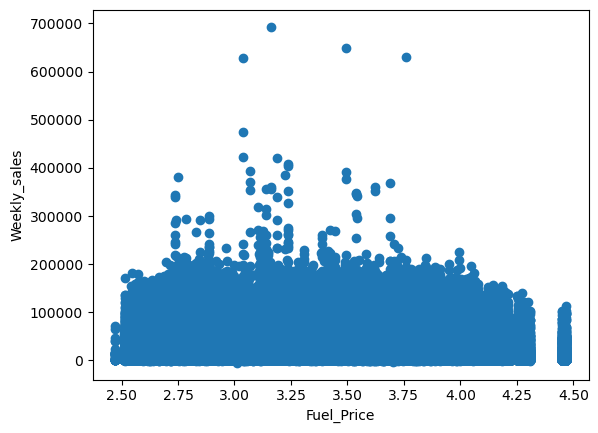

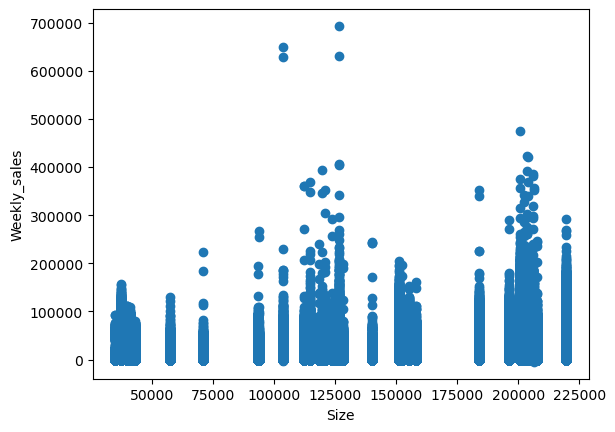

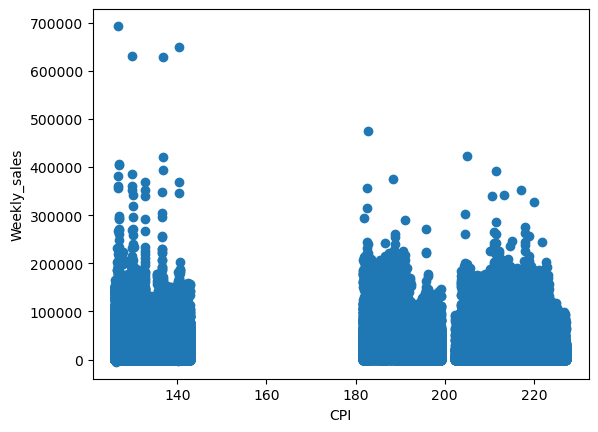

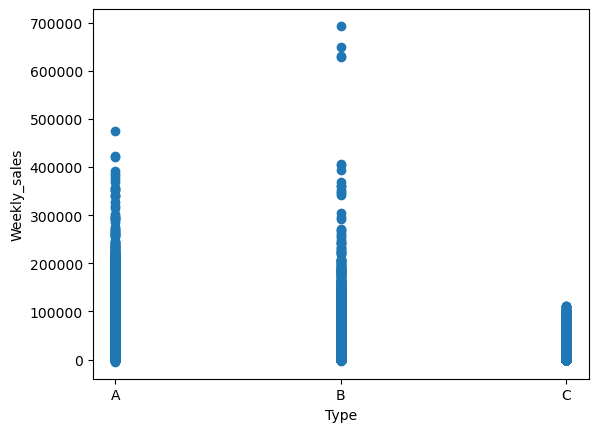

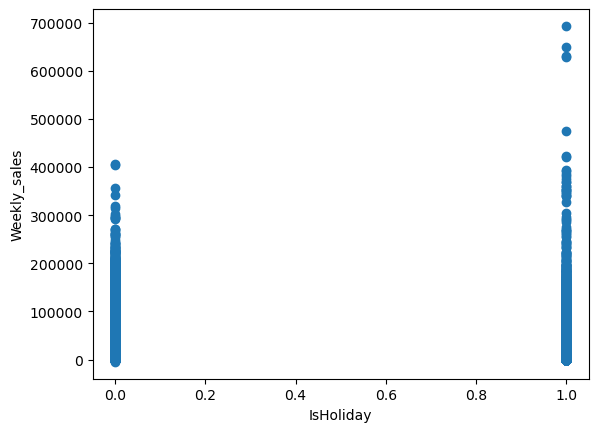

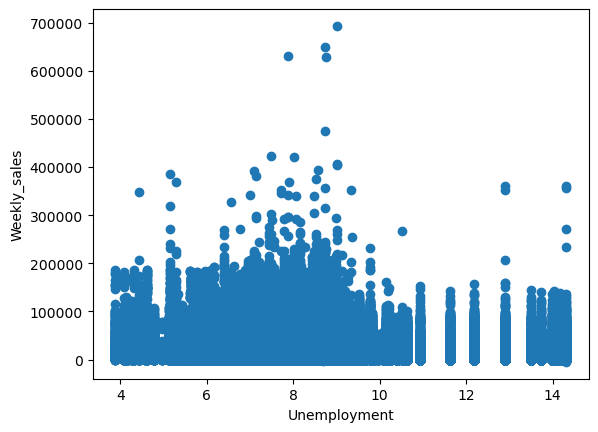

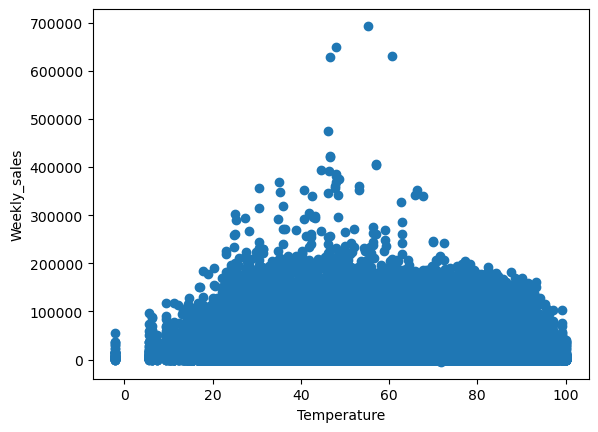

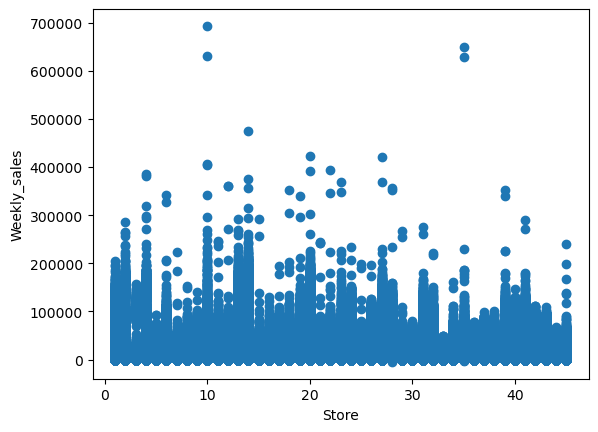

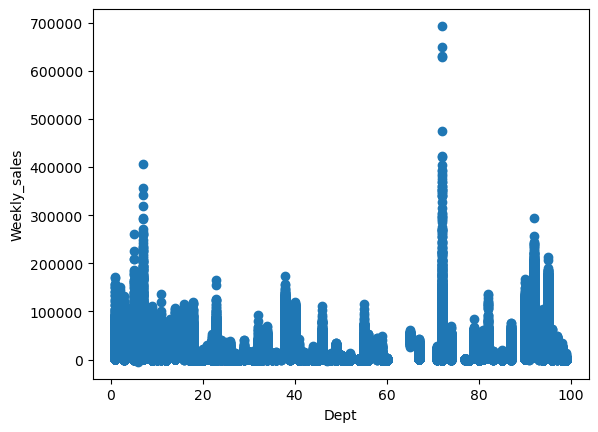

In [64]:
scatter(train_merge,'Fuel_Price')
scatter(train_merge,'Size')
scatter(train_merge,'CPI')
scatter(train_merge,'Type')
scatter(train_merge,'IsHoliday')
scatter(train_merge,'Unemployment')
scatter(train_merge,'Temperature')
scatter(train_merge,'Store')
scatter(train_merge,'Dept')

Correlation Matrix

 Average weekly sales per year and find oot if there is any other holiday pleak sales that were not considered by  IsHoliday filed
 



# year(2010)

In [65]:
weekly_sales_2010=train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()

<Axes: xlabel='Week'>

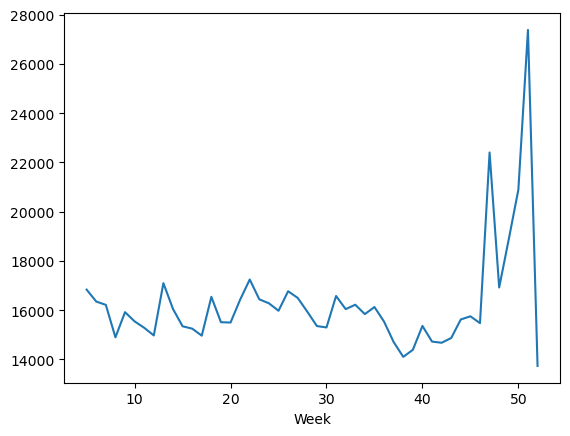

In [66]:
import seaborn as sns

sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)


# Year(2011)

<Axes: xlabel='Week'>

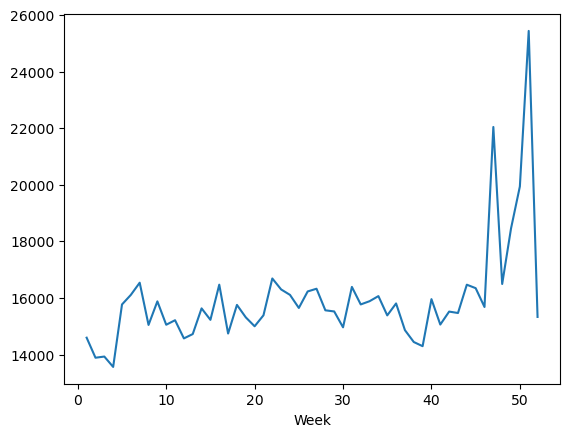

In [67]:
weekly_sales_2011=train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)


# Year(2012)

<Axes: xlabel='Week'>

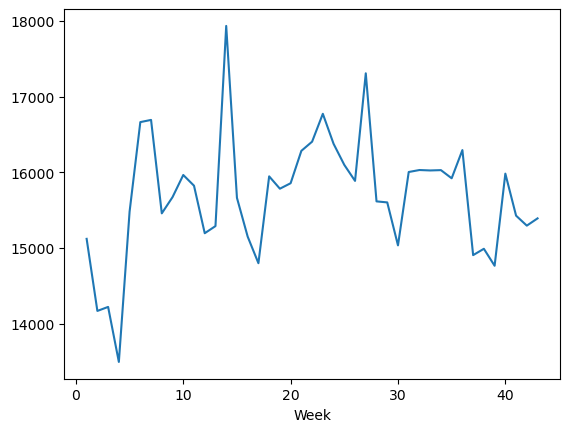

In [68]:
weekly_sales_2012=train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)


In [69]:
# plotting the above three plot together

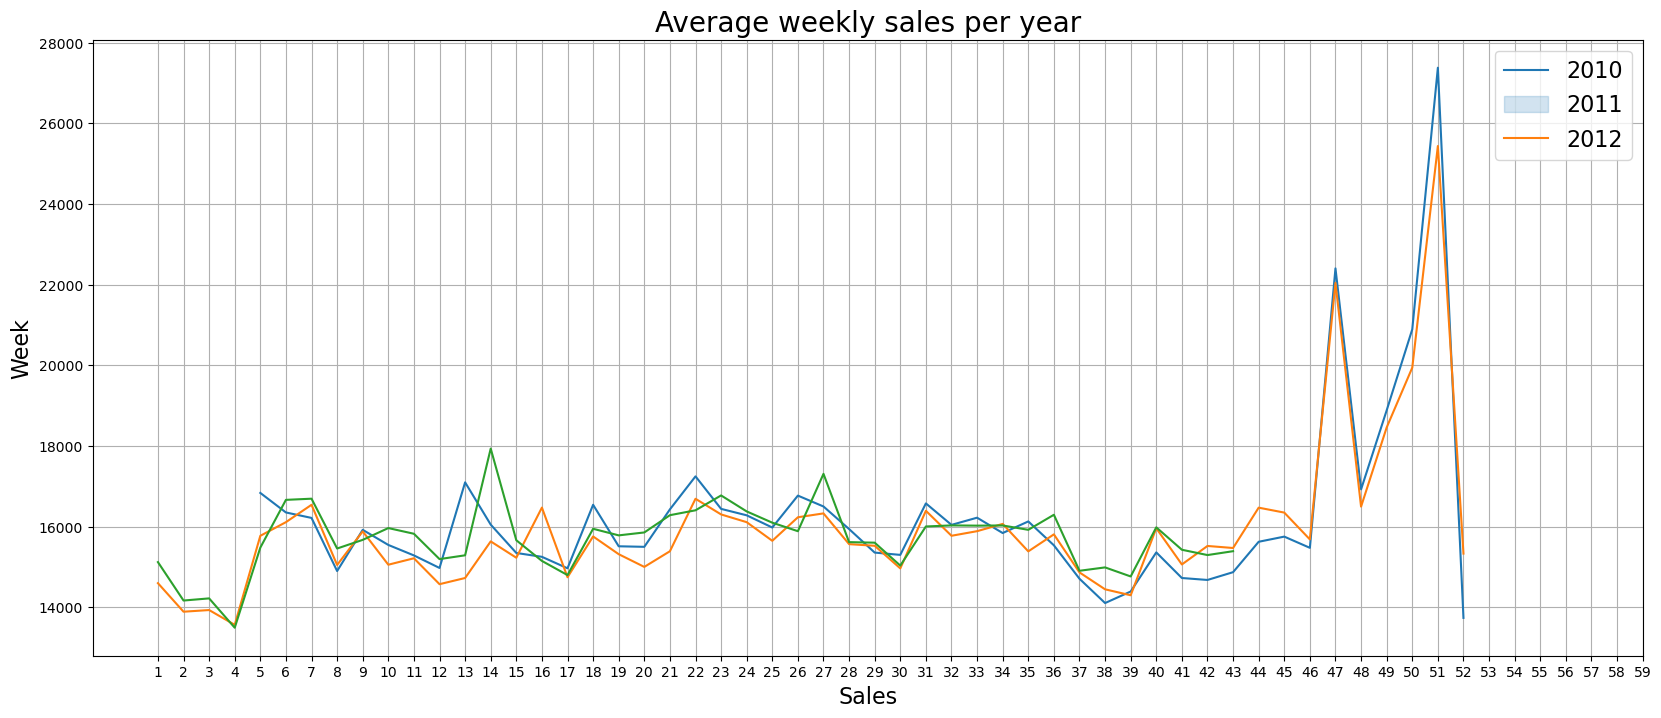

In [70]:
plt.figure(figsize=(20,8))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60,step=1))
plt.legend(['2010','2011','2012'],loc='best',fontsize=16)
plt.title('Average weekly sales per year',fontsize=20)
plt.xlabel('Sales',fontsize=16)
plt.ylabel('Week',fontsize=16)
plt.show()

In [71]:

# Average Sales per Department 

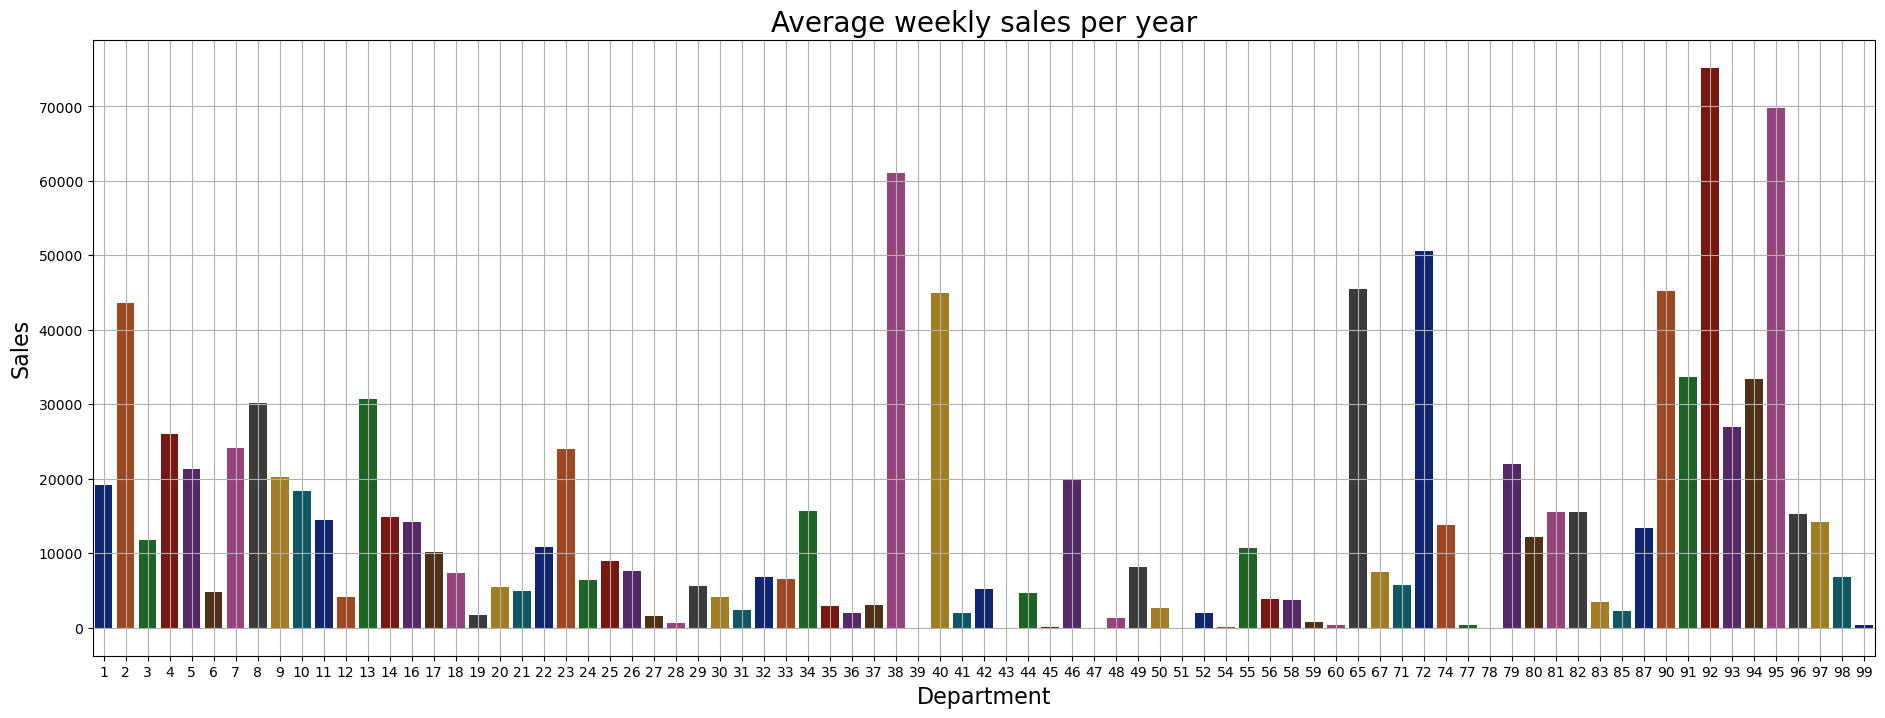

In [72]:
weekly_sales=train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(23,8))
sns.barplot(x=weekly_sales.index,y=weekly_sales.values,palette='dark')
plt.grid()
plt.title('Average weekly sales per year',fontsize=20)
plt.xlabel('Department',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.show()                                             

In [73]:
#Average Sales per store

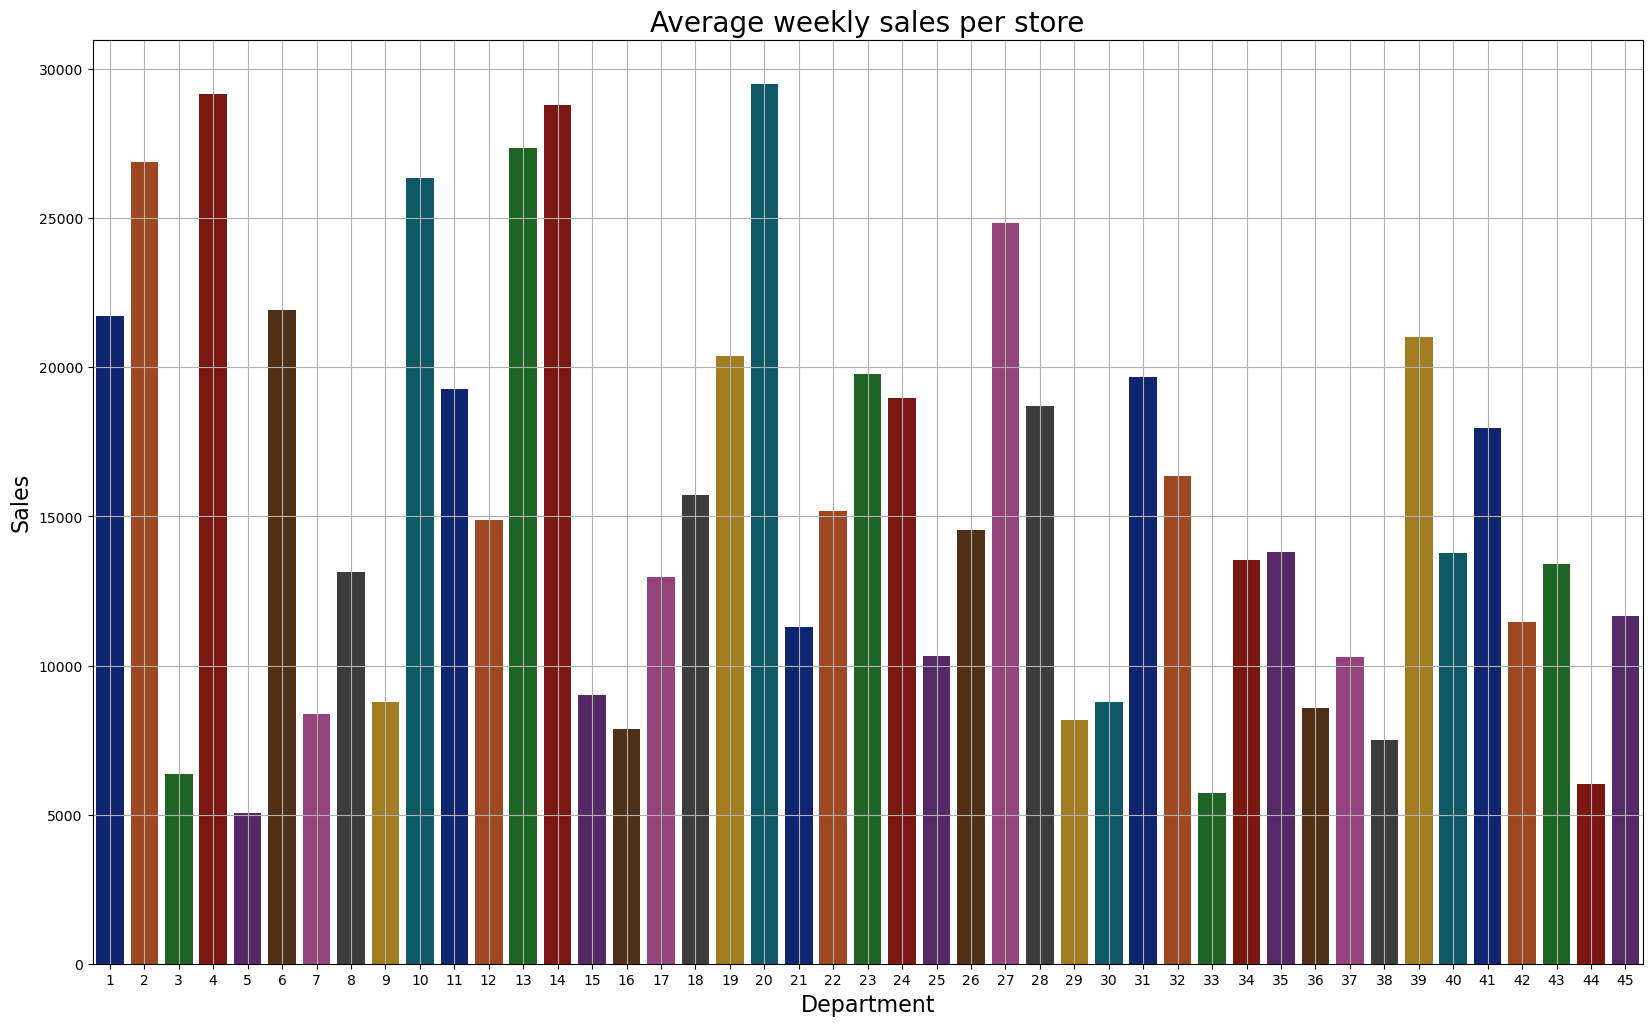

In [74]:
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()

plt.figure(figsize=(20, 12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average weekly sales per store', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()


C:\Users\Venus\AppData\Local\Temp\ipykernel_11980\148205404.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



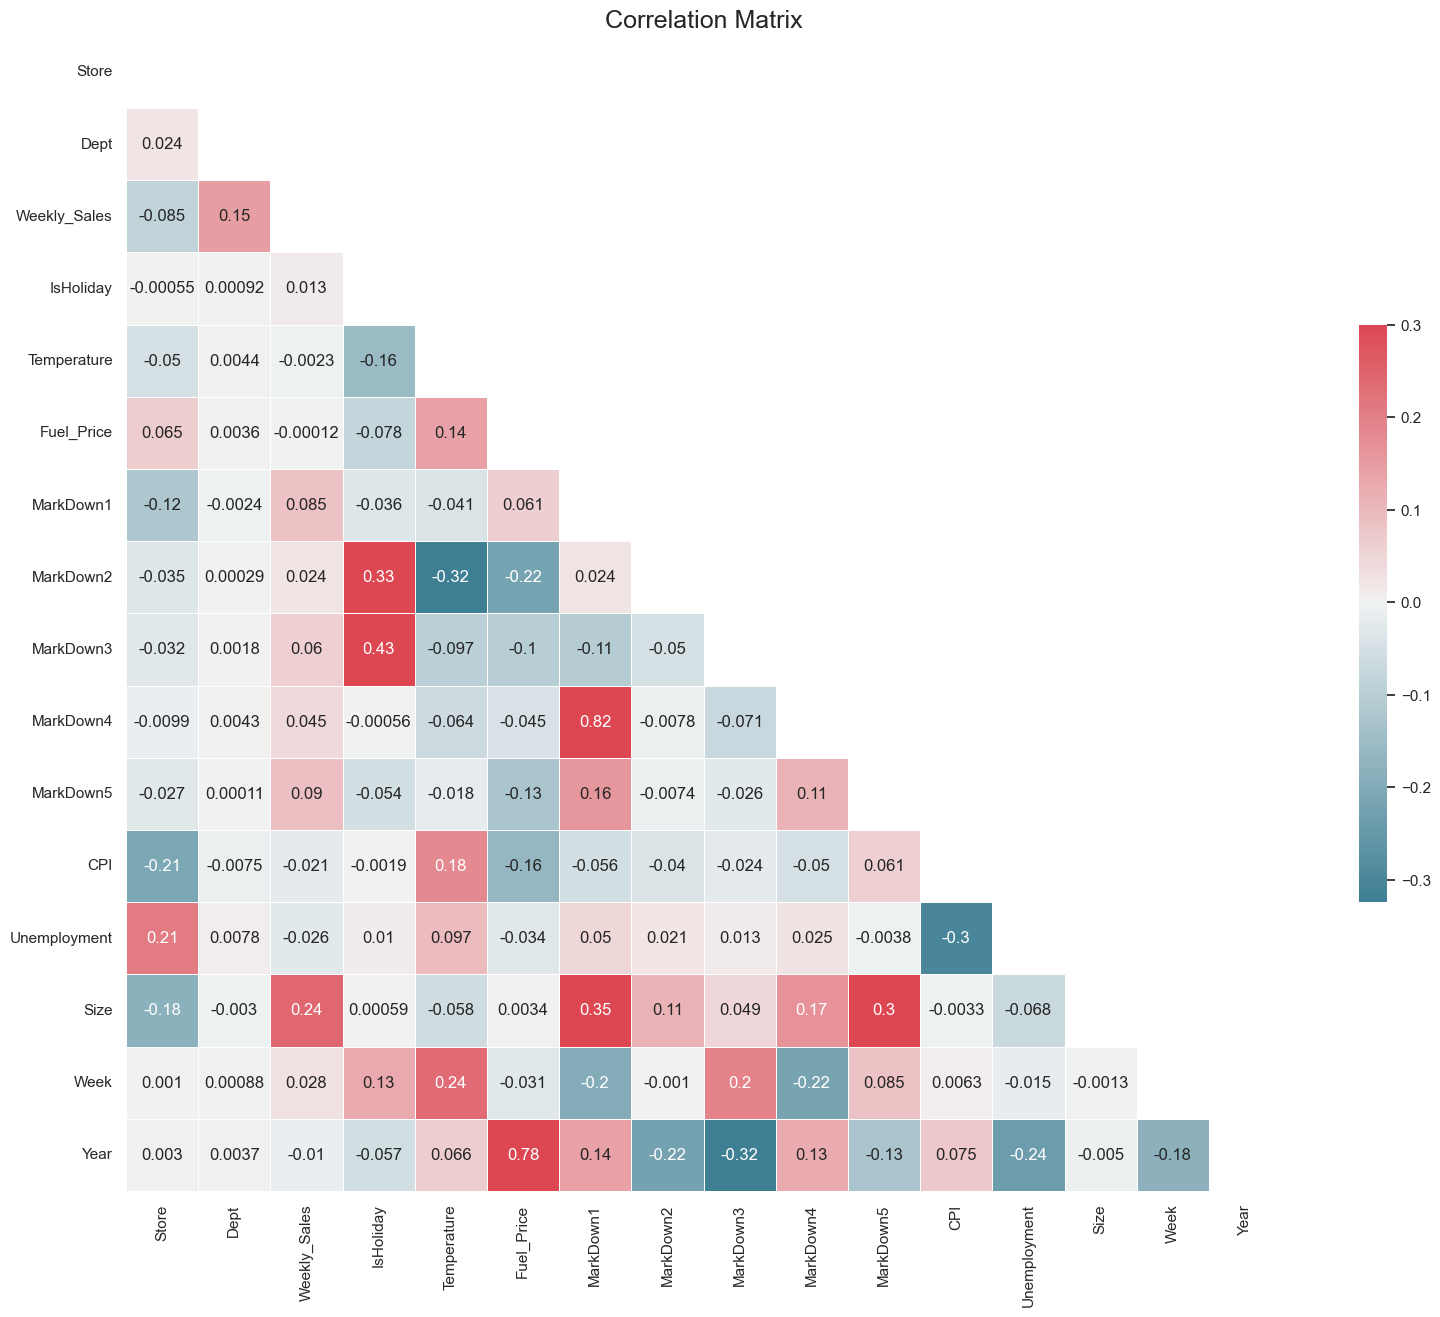

In [75]:
sns.set(style='white')
corr = train_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Changed np.bool to bool
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)
plt.show()

In [76]:
# Dropping down the variable that have weak correalation

In [77]:
train_merge=train_merge.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
test_merge=test_merge.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [78]:
train_merge

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

               CPI  Unemployment Type    Size  Week  Year  
0       211.096358         8.106    A  151315     5  2010  
1       211.242170         8.106    A  151315     6  2010  
2       211.289143         8.106    A  151315     7  2010  
3       211.319643         8.106    A  151315     8  2010  
4       211.350143         8.106    A  151315     9  2010  
...            ...           ...  ...     ...   ...   ...  
421565  192.013558         8.684    B  118221    39  2012  
421566  192.170412         8.667    B  118221    40  2012  
421567  192.327265         8.667    B  118221    41  2012  
421568  192.330854         8.667    B  118221    42  2012  
421569  192.308899         8.667    B  118221    43  2012  

[421570 rows x 12 columns]

In [186]:
train_merge

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

               CPI  Unemployment Type    Size  Week  Year  
0       211.096358         8.106    A  151315     5  2010  
1       211.242170         8.106    A  151315     6  2010  
2       211.289143         8.106    A  151315     7  2010  
3       211.319643         8.106    A  151315     8  2010  
4       211.350143         8.106    A  151315     9  2010  
...            ...           ...  ...     ...   ...   ...  
421565  192.013558         8.684    B  118221    39  2012  
421566  192.170412         8.667    B  118221    40  2012  
421567  192.327265         8.667    B  118221    41  2012  
421568  192.330854         8.667    B  118221    42  2012  
421569  192.308899         8.667    B  118221    43  2012  

[421570 rows x 12 columns]

In [79]:
test_merge

Store  Dept       Date  IsHoliday  Temperature         CPI  \
0           1     1 2012-11-02      False        55.32  223.462779   
1           1     1 2012-11-09      False        61.24  223.481307   
2           1     1 2012-11-16      False        52.92  223.512911   
3           1     1 2012-11-23       True        56.23  223.561947   
4           1     1 2012-11-30      False        52.34  223.610984   
...       ...   ...        ...        ...          ...         ...   
115059     45    98 2013-06-28      False        76.05         NaN   
115060     45    98 2013-07-05      False        77.50         NaN   
115061     45    98 2013-07-12      False        79.37         NaN   
115062     45    98 2013-07-19      False        82.84         NaN   
115063     45    98 2013-07-26      False        76.06         NaN   

        Unemployment Type    Size  Week  Year  
0              6.573    A  151315    44  2012  
1              6.573    A  151315    45  2012  
2              6.573    A  151315    46  2012  
3              6.573    A  151315    47  2012  
4              6.573    A  151315    48  2012  
...              ...  ...     ...   ...   ...  
115059           NaN    B  118221    26  2013  
115060           NaN    B  118221    27  2013  
115061           NaN    B  118221    28  2013  
115062           NaN    B  118221    29  2013  
115063           NaN    B  118221    30  2013  

[115064 rows x 11 columns]

In [188]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train_merge['IsHoliday']= label_encoder.fit_transform(train_merge['IsHoliday'])
train_merge['Type']= label_encoder.fit_transform(train_merge['Type'])

train_merge

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50          0        42.31   
1           1     1 2010-02-12      46039.49          1        38.51   
2           1     1 2010-02-19      41595.55          0        39.93   
3           1     1 2010-02-26      19403.54          0        46.63   
4           1     1 2010-03-05      21827.90          0        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37          0        64.88   
421566     45    98 2012-10-05        628.10          0        64.89   
421567     45    98 2012-10-12       1061.02          0        54.47   
421568     45    98 2012-10-19        760.01          0        56.47   
421569     45    98 2012-10-26       1076.80          0        58.85   

               CPI  Unemployment  Type    Size  Week  Year  
0       211.096358         8.106     0  151315     5  2010  
1       211.242170         8.106     0  151315     6  2010  
2       211.289143         8.106     0  151315     7  2010  
3       211.319643         8.106     0  151315     8  2010  
4       211.350143         8.106     0  151315     9  2010  
...            ...           ...   ...     ...   ...   ...  
421565  192.013558         8.684     1  118221    39  2012  
421566  192.170412         8.667     1  118221    40  2012  
421567  192.327265         8.667     1  118221    41  2012  
421568  192.330854         8.667     1  118221    42  2012  
421569  192.308899         8.667     1  118221    43  2012  

[421570 rows x 12 columns]

# Approach 2 for prediction

In [189]:
train_merge['month'] = pd.DatetimeIndex(train_merge['Date']).month

In [190]:
train_df['week'] = pd.DatetimeIndex(train_df['Date']).week

C:\Users\Venus\AppData\Local\Temp\ipykernel_11980\3209118767.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [191]:
train_merge=train_merge.drop(['Date'],axis=1)

<Axes: xlabel='month'>

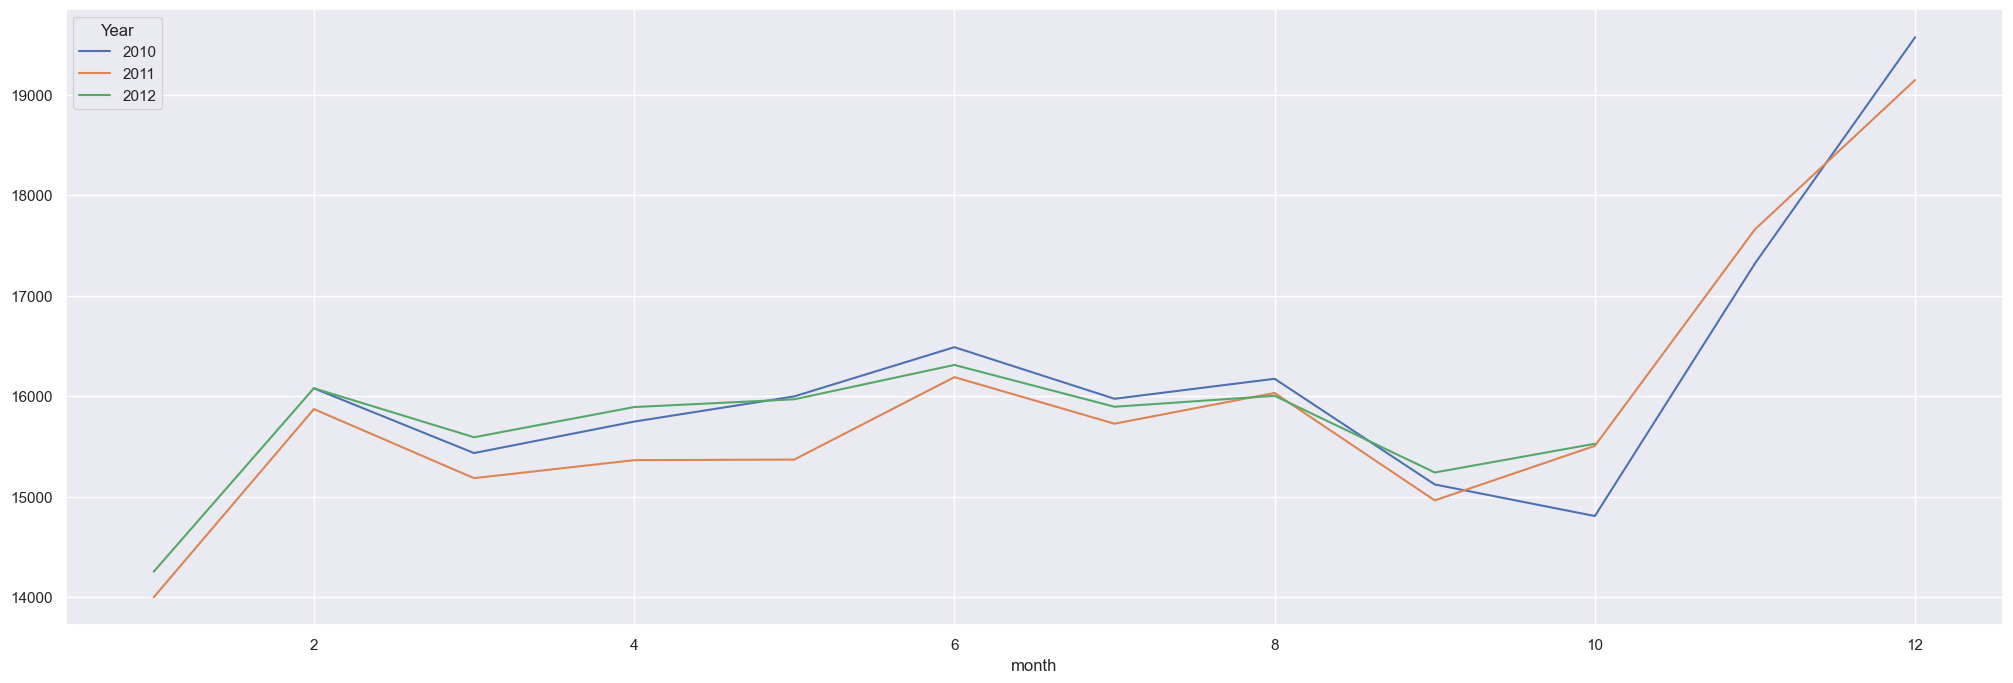

In [193]:
month_wise_sales = pd.pivot_table(train_merge, values = "Weekly_Sales", columns = "Year", index = "month")
month_wise_sales.plot()

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024004     -0.085195  -0.000548    -0.050097   
Dept          0.024004  1.000000      0.148032   0.000916     0.004437   
Weekly_Sales -0.085195  0.148032      1.000000   0.012774    -0.002312   
IsHoliday    -0.000548  0.000916      0.012774   1.000000    -0.155949   
Temperature  -0.050097  0.004437     -0.002312  -0.155949     1.000000   
CPI          -0.211088 -0.007477     -0.020921  -0.001944     0.182112   
Unemployment  0.208552  0.007837     -0.025864   0.010460     0.096730   
Type          0.226410  0.003708     -0.182242  -0.000798     0.042981   
Size         -0.182881 -0.002966      0.243828   0.000593    -0.058313   
Week          0.001031  0.000882      0.027673   0.128184     0.236276   
Year          0.002997  0.003738     -0.010111  -0.056746     0.065814   
month         0.001011  0.000904      0.028409   0.123376     0.235983   

                   CPI  Unemployment 

NameError: name 'plot' is not defined

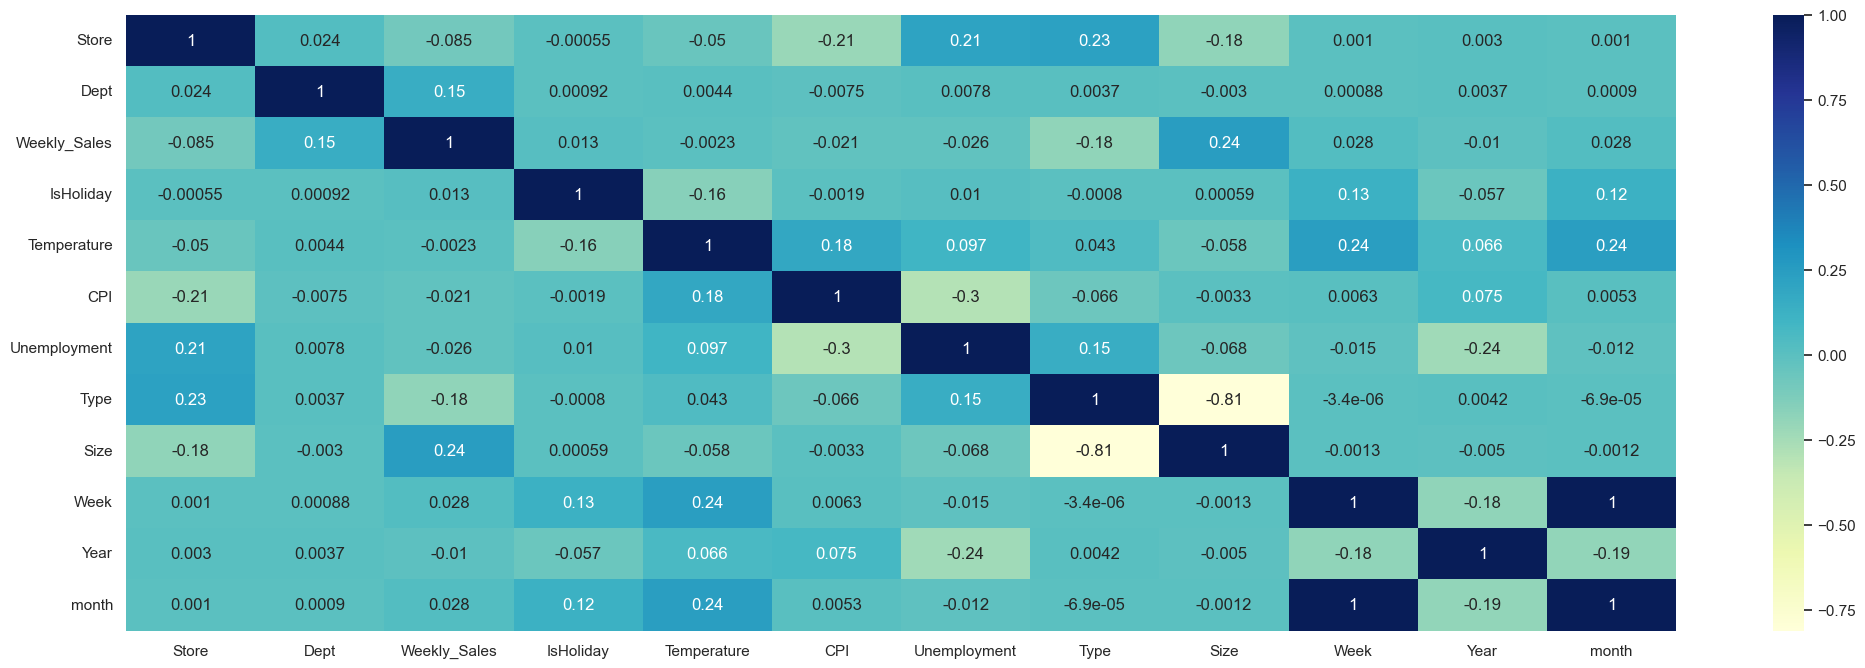

In [226]:
data = train_merge

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
plot.show()

In [227]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import shap

In [234]:

Features=train_merge.drop(['Weekly_Sales'],axis=1)
Target=train_merge['Weekly_Sales']

In [235]:
rf = RandomForestRegressor(n_estimators=20)
rf.fit(Features,Target)

RandomForestRegressor(n_estimators=20)

In [236]:
Features

Store  Dept  IsHoliday  Temperature         CPI  Unemployment  Type  \
0           1     1          0        42.31  211.096358         8.106     0   
1           1     1          1        38.51  211.242170         8.106     0   
2           1     1          0        39.93  211.289143         8.106     0   
3           1     1          0        46.63  211.319643         8.106     0   
4           1     1          0        46.50  211.350143         8.106     0   
...       ...   ...        ...          ...         ...           ...   ...   
421565     45    98          0        64.88  192.013558         8.684     1   
421566     45    98          0        64.89  192.170412         8.667     1   
421567     45    98          0        54.47  192.327265         8.667     1   
421568     45    98          0        56.47  192.330854         8.667     1   
421569     45    98          0        58.85  192.308899         8.667     1   

          Size  Week  Year  month  
0       151315     5  2010      2  
1       151315     6  2010      2  
2       151315     7  2010      2  
3       151315     8  2010      2  
4       151315     9  2010      3  
...        ...   ...   ...    ...  
421565  118221    39  2012      9  
421566  118221    40  2012     10  
421567  118221    41  2012     10  
421568  118221    42  2012     10  
421569  118221    43  2012     10  

[421570 rows x 11 columns]

# Fearture importance


<BarContainer object of 11 artists>

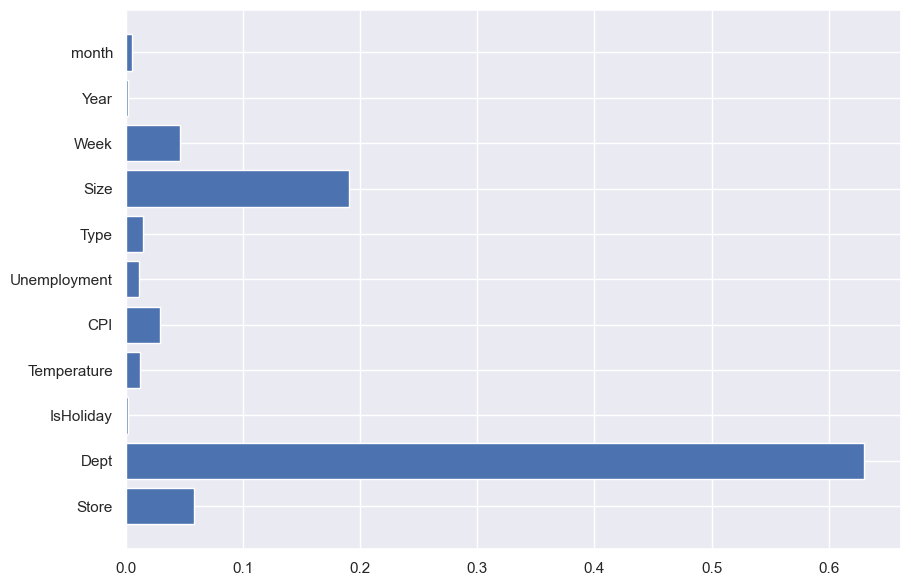

In [237]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)

In [239]:
F=Features.drop(["IsHoliday",'Year'],axis=1)

In [240]:

F

Store  Dept  Temperature         CPI  Unemployment  Type    Size  \
0           1     1        42.31  211.096358         8.106     0  151315   
1           1     1        38.51  211.242170         8.106     0  151315   
2           1     1        39.93  211.289143         8.106     0  151315   
3           1     1        46.63  211.319643         8.106     0  151315   
4           1     1        46.50  211.350143         8.106     0  151315   
...       ...   ...          ...         ...           ...   ...     ...   
421565     45    98        64.88  192.013558         8.684     1  118221   
421566     45    98        64.89  192.170412         8.667     1  118221   
421567     45    98        54.47  192.327265         8.667     1  118221   
421568     45    98        56.47  192.330854         8.667     1  118221   
421569     45    98        58.85  192.308899         8.667     1  118221   

        Week  month  
0          5      2  
1          6      2  
2          7      2  
3          8      2  
4          9      3  
...      ...    ...  
421565    39      9  
421566    40     10  
421567    41     10  
421568    42     10  
421569    43     10  

[421570 rows x 9 columns]

In [241]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(F, Target, test_size= 0.25, random_state=0)

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

# Apply DecisionTreeRegressor

In [243]:
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)


In [244]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3783762761651074
MSE score  : 320150089.8969442
RMSE:  17892.738468354815


# Apply  RandomForestRegressor

In [245]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [246]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3783762761651074
MSE score  : 47431341.44938609
RMSE:  6887.041560015889


# Apply XGBRegressor

In [247]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [248]:
y_pred2 = model.predict(x_test)

In [249]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.9492299960751803
MSE score  : 26147685.001990695
RMSE:  5113.480712977286


In [250]:
y_pred2

array([ 9829.675 , 34179.88  ,  1971.3284, ..., 34704.12  , 59952.215 ,
       13276.649 ], dtype=float32)

# Using regularization technique

In [251]:
#Regularization
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(x_train,y_train)


Ridge(alpha=0.5)

In [252]:
y_pred3 = model.predict(x_test)

In [253]:

y_pred3


array([ 9829.675 , 34179.88  ,  1971.3284, ..., 34704.12  , 59952.215 ,
       13276.649 ], dtype=float32)

In [254]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.9492299960751803
MSE score  : 26147685.001990695
RMSE:  5113.480712977286


In [255]:

y_test

233571     9526.04
88992     26393.68
367842      736.16
184359      422.40
26175         4.00
            ...   
117461     2260.16
392851     1088.33
35553     33173.83
212138    67652.79
199427    15286.53
Name: Weekly_Sales, Length: 105393, dtype: float64

we can see here that after using regularization techniques and xgboost we got less error


that means prediction is going on right way...